In [7]:
import openpyxl

def delete_zero_columns(filename):
    # 打开 Excel 文件
    wb = openpyxl.load_workbook(filename)
    sheet = wb.active
    
    # 获取每列的最大行数和最大列数
    max_row = sheet.max_row
    max_col = sheet.max_column
    
    # 遍历每一列
    for col in range(1, max_col + 1):
        all_zero = True  # 假设当前列数据全为0
        # 从第二行开始遍历
        for row in range(2, max_row + 1):
            cell_value = sheet.cell(row=row, column=col).value
            if cell_value is not None and cell_value != 0:
                all_zero = False  # 当前列存在非零值，修改标志
                break  # 不再检查当前列的其余行
        if all_zero:
            # 如果当前列数据全为0，删除该列
            sheet.delete_cols(col)
            max_col -= 1  # 更新最大列数，因为删除了一列
            col -= 1  # 因为删除了一列，所以当前列索引需要减1
    
    # 保存修改后的 Excel 文件
    wb.save(filename)

# 调用函数并传入要处理的 Excel 文件名
delete_zero_columns("CN-250-feature.xlsx")


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   23.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   53.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 962 out of 962 | elapsed:  2.5min finished

[2024-06-07 09:39:44] Features: 1/20 -- score: 0.5976779788626276[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   28.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 961 out of 961 | elapsed:  3.2min finished

[2024-06-07 09:42:54] Features: 2/20 -- score: 0.7232060509422225[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_job

选中的特征：
Index(['AATS2s', 'AATS4s', 'ATSC1pe', 'AATSC3m', 'AATSC1p', 'Xc-6d', 'Xc-6dv',
       'NdsCH', 'SssCH2', 'SaaCH', 'SdssC', 'SssO', 'ETA_beta_ns_d',
       'AETA_eta', 'BIC3', 'CIC2', 'CIC3', 'PEOE_VSA3', 'VSA_EState3',
       'RotRatio'],
      dtype='object')


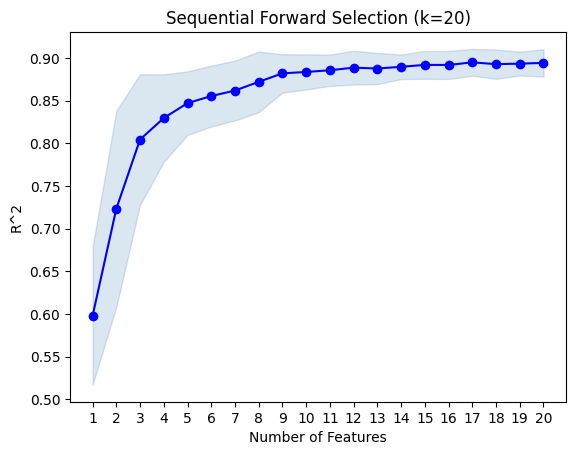

In [1]:
# 导入必要的库
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

# 忽略 FutureWarning 类型的警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 生成示例数据
dataset = pd.read_excel('CN-250-feature.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 7:1172]
Y = dataset.iloc[:, 5]
# 设置并行作业的数量
n_jobs = 8
# 使用前向特征选择
sfs1 = SFS(RandomForestRegressor(random_state=42),
           k_features=25,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # 进行特征选择
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("可能无法找到足够数量的特征或模型无法收敛。")

# 获取选中特征的列索引
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"选中的特征：\n{selected_features}")

fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()


In [2]:
# 创建一个新的数据框，只包含选择的特征
selected_data = dataset[selected_features]

# 将选择的特征存储到Excel中
selected_data.to_excel('CNselected_features-250-20.xlsx', index=False)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   29.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 962 out of 962 | elapsed:  3.1min finished

[2024-08-11 09:37:20] Features: 1/25 -- score: 0.5976779788626276[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   31.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 961 out of 961 | elapsed:  3.3min finished

[2024-08-11 09:40:37] Features: 2/25 -- score: 0.7232060509422225[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_job

选中的特征：
Index(['AATS2s', 'AATS4s', 'ATSC1pe', 'AATSC3m', 'AATSC1p', 'GATS4se', 'Xc-6d',
       'Xc-6dv', 'NdsCH', 'NssssC', 'SdCH2', 'SssCH2', 'SaaCH', 'SdssC',
       'SssO', 'ETA_beta_ns_d', 'AETA_eta', 'BIC3', 'CIC2', 'CIC3',
       'PEOE_VSA3', 'VSA_EState3', 'n8FRing', 'RotRatio', 'GGI10'],
      dtype='object')


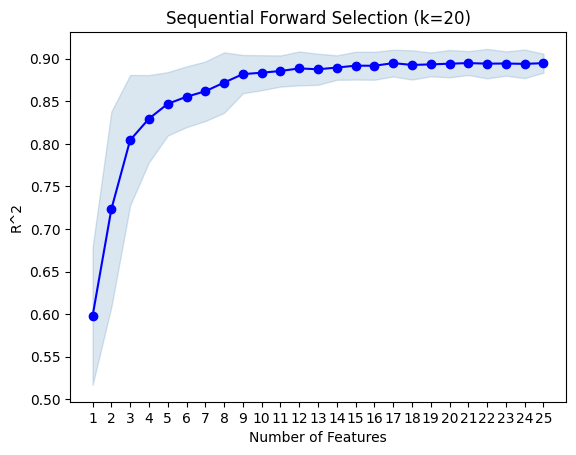

In [1]:
# 导入必要的库
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

# 忽略 FutureWarning 类型的警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 生成示例数据
dataset = pd.read_excel('CN-250-feature.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 7:1172]
Y = dataset.iloc[:, 5]
# 设置并行作业的数量
n_jobs = 8
# 使用前向特征选择
sfs1 = SFS(RandomForestRegressor(random_state=42),
           k_features=25,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # 进行特征选择
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("可能无法找到足够数量的特征或模型无法收敛。")

# 获取选中特征的列索引
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"选中的特征：\n{selected_features}")

fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()

In [11]:
import multiprocessing

num_cores = multiprocessing.cpu_count()
print("你的电脑有 {} 个核心。".format(num_cores))


你的电脑有 8 个核心。


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 276 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 682 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 962 out of 962 | elapsed:   10.9s finished

[2024-06-13 11:39:16] Features: 1/20 -- score: 0.5974338313616616[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 276 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 682 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 946 out of 961 | elapsed:   11.7s remaining:    0.1s
[Parallel(n_jobs=8)]: Done 961 out of 961 | elapsed:   11.8s finished

[2024-06-13 11:39:28] Features: 2/20 -- score: 0.7343348777291439[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0

选中的特征：
Index(['nAcid', 'ATSC1i', 'AATSC2d', 'MATS2c', 'GATS2s', 'GATS4s', 'GATS4Z',
       'GATS3i', 'NsCH3', 'NssssC', 'NdO', 'NaaO', 'SssCH2', 'IC2', 'CIC1',
       'CIC2', 'PEOE_VSA12', 'SlogP_VSA1', 'PetitjeanIndex', 'mZagreb2'],
      dtype='object')


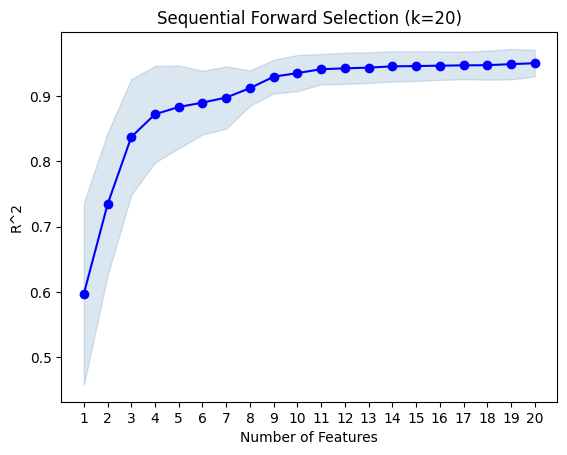

In [3]:
# 导入必要的库
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.svm import SVR
# 忽略 FutureWarning 类型的警告
warnings.filterwarnings("ignore", category=FutureWarning)

# 生成示例数据
dataset = pd.read_excel('CN-250-feature.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 7:1172]
Y = dataset.iloc[:, 5]
# 设置并行作业的数量
n_jobs = 8
# 使用前向特征选择
sfs1 = SFS(SVR(kernel='rbf', C=1028, gamma=0.01, epsilon=0.882376041907064),
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # 进行特征选择
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("可能无法找到足够数量的特征或模型无法收敛。")

# 获取选中特征的列索引
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"选中的特征：\n{selected_features}")

fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()


In [4]:
# 创建一个新的数据框，只包含选择的特征
selected_data = dataset[selected_features]

# 将选择的特征存储到Excel中
selected_data.to_excel('SVR-CNselected_features-250-20.xlsx', index=False)